# Forecasting models

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from qgis.core import *
from qgis.PyQt.QtGui import *
from qgis.PyQt.QtCore import *
from IPython.display import Image

In [2]:
QgsApplication.setPrefixPath(r'C:\\OSGeo4W64\\apps\\qgis', True)
qgs = QgsApplication([], True)
qgs.initQgis()
sys.path.append(r'C:\OSGeo4W64\apps\qgis\python\plugins')
project = QgsProject.instance()

In [3]:
path = "C:\\OSGeo4W64\\bin\\SIG\\Projeto_Italy\\Mapa\\ITA_adm1.shp"
map_layer = QgsVectorLayer(path, 'Italy map', 'ogr')

if not map_layer.isValid():
    print("Failed to load the layer!")
else:
    project.addMapLayer(map_layer)
    print("Sucess")

Sucess


In [4]:
csv_path = "file:///C:/OSGeo4W64/bin/SIG/Projeto_Italy/Dataset/covid_italy.csv?delimiter=,'"
csv_layer = QgsVectorLayer(csv_path, 'Data', 'delimitedtext')

if not csv_layer.isValid():
    print('Layer failed to load!')
else:
    project.addMapLayer(csv_layer)
    print("Sucess")

Sucess


In [5]:
joinName = 'name_region'
targetName = 'NAME_1'

joinObject = QgsVectorLayerJoinInfo()
joinObject.setJoinFieldName(joinName)
joinObject.setTargetFieldName(targetName)
joinObject.setJoinLayerId(csv_layer.id())
joinObject.setUsingMemoryCache(True)
joinObject.setJoinLayer(csv_layer)
flag = map_layer.addJoin(joinObject)

In [6]:
## For data
import pandas as pd
import numpy as np
## For plotting
import matplotlib.pyplot as plt
## For parametric fitting
from scipy import optimize

**Lombardia**

Most affected region of Italy

In [7]:
values_case = []
values_deaths = []
values_new = []
datas = []

lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['name_region']=="Lombardia":
        if feature['total_positive']>0:
            values_case.append(feature['total_case'])
            values_deaths.append(feature['deaths'])
            values_new.append(feature['new_positive'])
            datas.append(feature['data'])



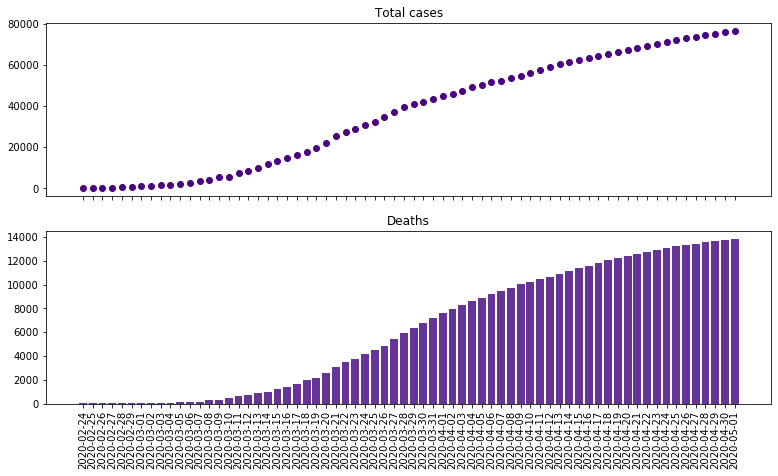

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(13,7))
y_pos = np.arange(len(datas))

ax[0].scatter(datas, values_case, color="indigo")
plt.xticks(y_pos, datas, rotation='vertical')
ax[0].set(title="Total cases")
ax[1].bar(datas, values_deaths, color="rebeccapurple")
ax[1].set(title="Deaths")
plt.savefig('../Imagens/Prevision_lombardia_totalcase_deaths.png', dpi=300, format='png')
plt.show()


**Number of cases**

In [10]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(values_case)))

'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(values_case)))


'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(values_case)))

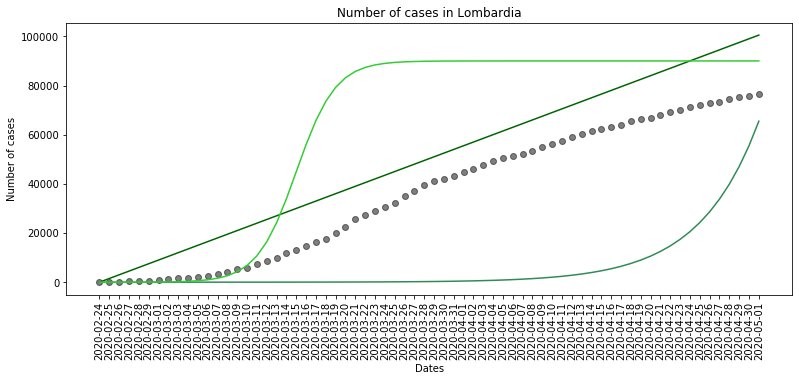

In [12]:
fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(datas))


ax.scatter(y_pos, values_case, alpha=0.5, color='black')
plt.xticks(y_pos, datas, rotation='vertical')
ax.plot(y_pos, y_linear, label="linear", color="darkgreen")
ax.plot(y_pos, y_exponential, label="exponential", color="seagreen")
ax.plot(y_pos, y_logistic, label="logistic", color="limegreen")
plt.ylabel('Number of cases')
plt.xlabel('Dates')
plt.title('Number of cases in Lombardia')
plt.savefig('../Imagens/Prevision_lombardia_numberofcases.png', dpi=300, format='png')
plt.show()

**Number of deaths**

In [13]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(values_deaths)))

'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(values_deaths)))


'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(values_deaths)))

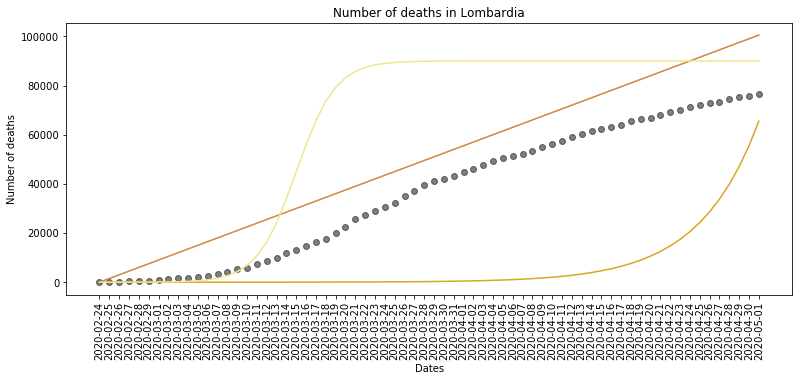

In [13]:
fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(datas))


ax.scatter(y_pos, values_case, alpha=0.5, color='black')
plt.xticks(y_pos, datas, rotation='vertical')
ax.plot(y_pos, y_linear, label="linear", color="peru")
ax.plot(y_pos, y_exponential, label="exponential", color="goldenrod")
ax.plot(y_pos, y_logistic, label="logistic", color="khaki")
plt.ylabel('Number of deaths')
plt.xlabel('Dates')
plt.title('Number of deaths in Lombardia')
plt.savefig('../Imagens/Prevision_lombardia_numberofdeaths.png', dpi=300, format='png')
plt.show()

**Parametric Fitting**

In [14]:
df=pd.read_csv(open("../Dataset/lombardia_last.csv"))
df.index = df['data']

In [15]:
date = df['data'].tolist()
xvalues=np.arange(len(date))

totalcases = df['total_case'].tolist()

print(date)
print(totalcases)

['24/02/2020', '25/02/2020', '26/02/2020', '27/02/2020', '28/02/2020', '29/02/2020', '01/03/2020', '02/03/2020', '03/03/2020', '04/03/2020', '05/03/2020', '06/03/2020', '07/03/2020', '08/03/2020', '09/03/2020', '10/03/2020', '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020', '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020', '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020', '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020', '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020', '08/04/2020', '09/04/2020', '10/04/2020', '11/04/2020', '12/04/2020', '13/04/2020', '14/04/2020', '15/04/2020', '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020', '20/04/2020', '21/04/2020', '22/04/2020', '23/04/2020', '24/04/2020', '25/04/2020', '26/04/2020', '27/04/2020', '28/04/2020', '29/04/2020', '30/04/2020', '01/05/2020']
[172, 240, 258, 403, 531, 615, 984, 1254, 1520,

In [16]:

'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(xdata, c, k, m):
    ydata = c / (1 + np.exp(-k*(xdata-m)))
    return ydata
## optimize from scipy
logistic_model, cov = optimize.curve_fit(logistic_f, xdata=xvalues, ydata=totalcases, maxfev=100000, p0=[np.max(totalcases), 1, 1])
## print the parameters
logistic_model

array([7.41234716e+04, 1.09572259e-01, 3.35496176e+01])

In [23]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="maroon")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="salmon")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
    
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [24]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve(ts, f, model, pred_ahead=None, zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index
    start=0
    index = pd.date_range(start=start,periods=pred_ahead)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

TypeError: Timestamp('1970-01-02 00:00:00', freq='D') is not a string

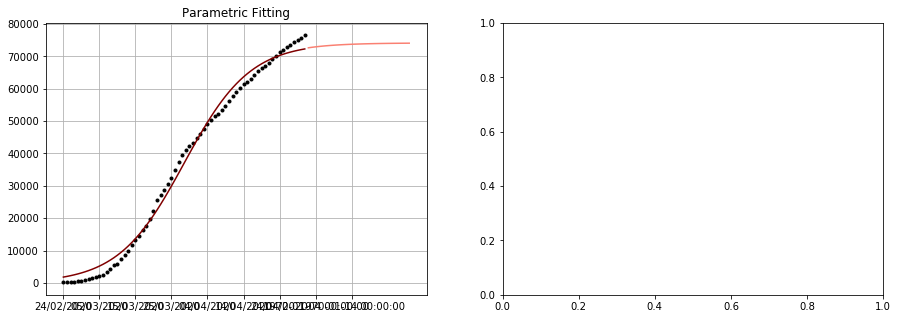

In [25]:
preds = forecast_curve(df["total_case"], logistic_f, logistic_model, pred_ahead=30, zoom=7)

# Molise

**Less affected region of Italy**

In [29]:
values_case = []
values_deaths = []
values_new = []
datas = []

lowerTotal = 0
i = 0


for feature in csv_layer.getFeatures():
    if feature['name_region']=="Molise":
        if feature['total_positive']>0:
            values_case.append(feature['total_case'])
            values_deaths.append(feature['deaths'])
            values_new.append(feature['new_positive'])
            datas.append(feature['data'])

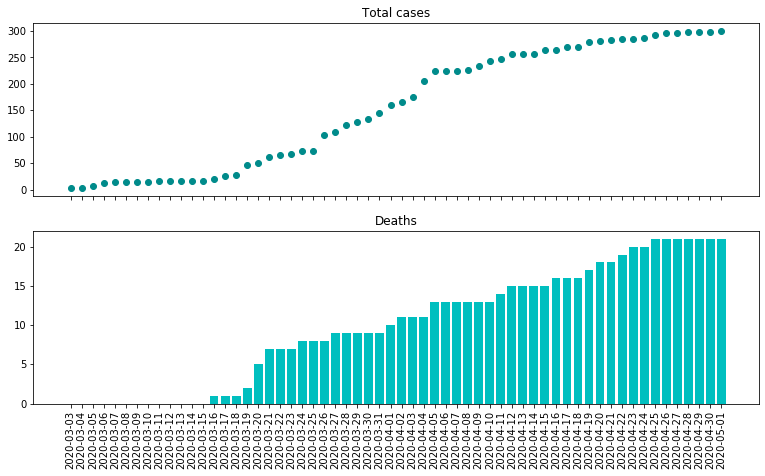

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(13,7))
y_pos = np.arange(len(datas))

ax[0].scatter(datas, values_case, color="darkcyan")
plt.xticks(y_pos, datas, rotation='vertical')
ax[0].set(title="Total cases")
ax[1].bar(datas, values_deaths, color="c")
ax[1].set(title="Deaths")
plt.savefig('../Imagens/Prevision__Molise_totalcase_deaths.png', dpi=300, format='png')
plt.show()


**Number of cases**

In [32]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(values_case)))

'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(values_case)))


'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(values_case)))

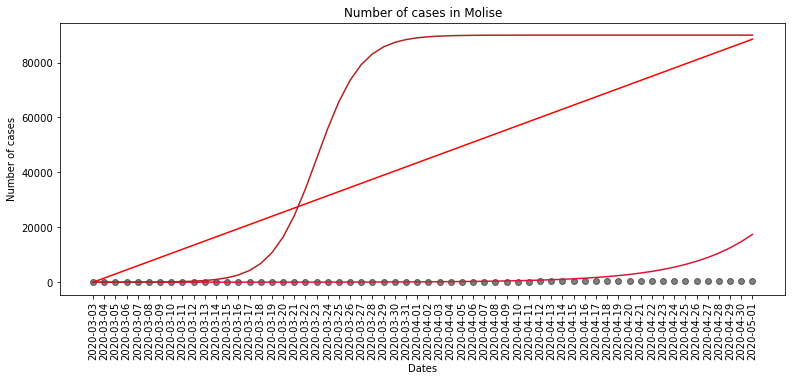

In [33]:
fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(datas))


ax.scatter(y_pos, values_case, alpha=0.5, color='black')
plt.xticks(y_pos, datas, rotation='vertical')
ax.plot(y_pos, y_linear, label="linear", color="red")
ax.plot(y_pos, y_exponential, label="exponential", color="crimson")
ax.plot(y_pos, y_logistic, label="logistic", color="firebrick")
plt.ylabel('Number of cases')
plt.xlabel('Dates')
plt.title('Number of cases in Molise')
plt.savefig('../Imagens/Prevision_molise_numberofcases.png', dpi=300, format='png')
plt.show()

**Number of deaths**

In [34]:
'''
Linear function: f(x) = a + b*x
'''
def f(x):
    return 10 + 1500*x

y_linear = f(x=np.arange(len(values_deaths)))

'''
Exponential function: f(x) = a + b^x
'''
def f(x):
    return 10 + 1.18**x

y_exponential = f(x=np.arange(len(values_deaths)))


'''
Logistic function: f(x) = a / (1 + e^(-b*(x-c)))
'''
def f(x): 
    return 90000 / (1 + np.exp(-0.5*(x-20)))

y_logistic = f(x=np.arange(len(values_deaths)))

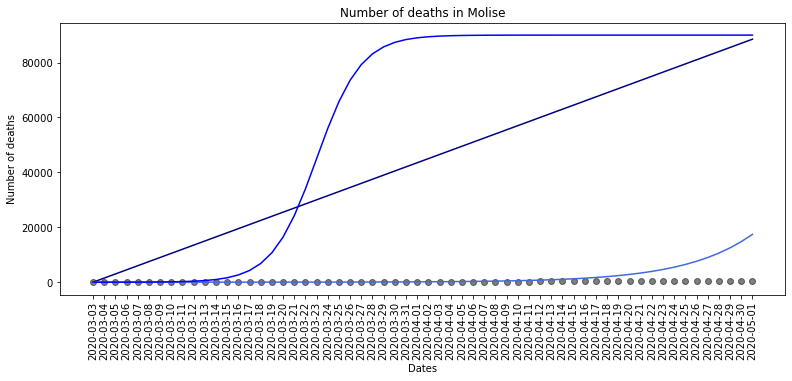

In [35]:
fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(datas))


ax.scatter(y_pos, values_case, alpha=0.5, color='black')
plt.xticks(y_pos, datas, rotation='vertical')
ax.plot(y_pos, y_linear, label="linear", color="navy")
ax.plot(y_pos, y_exponential, label="exponential", color="royalblue")
ax.plot(y_pos, y_logistic, label="logistic", color="blue")
plt.ylabel('Number of deaths')
plt.xlabel('Dates')
plt.title('Number of deaths in Molise')
plt.savefig('../Imagens/Prevision_molise_numberofdeaths.png', dpi=300, format='png')
plt.show()

In [37]:
df=pd.read_csv(open("../Dataset/molise_last.csv"))
df.index = df['data']

In [38]:
date = df['data'].tolist()
xvalues=np.arange(len(date))

totalcases = df['total_case'].tolist()

print(date)
print(totalcases)

['24/02/2020', '25/02/2020', '26/02/2020', '27/02/2020', '28/02/2020', '29/02/2020', '01/03/2020', '02/03/2020', '03/03/2020', '04/03/2020', '05/03/2020', '06/03/2020', '07/03/2020', '08/03/2020', '09/03/2020', '10/03/2020', '11/03/2020', '12/03/2020', '13/03/2020', '14/03/2020', '15/03/2020', '16/03/2020', '17/03/2020', '18/03/2020', '19/03/2020', '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020', '24/03/2020', '25/03/2020', '26/03/2020', '27/03/2020', '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020', '01/04/2020', '02/04/2020', '03/04/2020', '04/04/2020', '05/04/2020', '06/04/2020', '07/04/2020', '08/04/2020', '09/04/2020', '10/04/2020', '11/04/2020', '12/04/2020', '13/04/2020', '14/04/2020', '15/04/2020', '16/04/2020', '17/04/2020', '18/04/2020', '19/04/2020', '20/04/2020', '21/04/2020', '22/04/2020', '23/04/2020', '24/04/2020', '25/04/2020', '26/04/2020', '27/04/2020', '28/04/2020', '29/04/2020', '30/04/2020', '01/05/2020']
[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 7, 12, 14, 14, 1

In [39]:

'''
Logistic function: f(x) = capacity / (1 + e^-k*(x - midpoint) )
'''
def logistic_f(xdata, c, k, m):
    ydata = c / (1 + np.exp(-k*(xdata-m)))
    return ydata
## optimize from scipy
logistic_model, cov = optimize.curve_fit(logistic_f, xdata=xvalues, ydata=totalcases, maxfev=100000, p0=[np.max(totalcases), 1, 1])
## print the parameters
logistic_model

array([2.95461863e+02, 1.52511780e-01, 3.58306342e+01])

In [43]:
'''
Plot parametric fitting.
'''
def utils_plot_parametric(dtf, zoom=30, figsize=(15,5)):
    ## interval
    dtf["residuals"] = dtf["ts"] - dtf["model"]
    dtf["conf_int_low"] = dtf["forecast"] - 1.96*dtf["residuals"].std()
    dtf["conf_int_up"] = dtf["forecast"] + 1.96*dtf["residuals"].std()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    
    ## entire series
    dtf["ts"].plot(marker=".", linestyle='None', ax=ax[0], title="Parametric Fitting", color="black")
    dtf["model"].plot(ax=ax[0], color="dodgerblue")
    dtf["forecast"].plot(ax=ax[0], grid=True, color="fuchsia")
    ax[0].fill_between(x=dtf.index, y1=dtf['conf_int_low'], y2=dtf['conf_int_up'], color='b', alpha=0.3)
   
    plt.show()
    return dtf[["ts","model","residuals","conf_int_low","forecast","conf_int_up"]]

In [44]:
'''
Forecast unknown future.
:parameter
    :param ts: pandas series
    :param f: function
    :param model: list of optim params
    :param pred_ahead: number of observations to forecast (ex. pred_ahead=30)
    :param freq: None or str - 'B' business day, 'D' daily, 'W' weekly, 'M' monthly, 'A' annual, 'Q' quarterly
    :param zoom: for plotting
'''
def forecast_curve(ts, f, model, pred_ahead=None, zoom=30, figsize=(15,5)):
    ## fit
    X = np.arange(len(ts))
    fitted = f(X, model[0], model[1], model[2])
    dtf = ts.to_frame(name="ts")
    dtf["model"] = fitted
    
    ## index
    start=0
    index = pd.date_range(start=start,periods=pred_ahead)
    index = index[1:]
    ## forecast
    Xnew = np.arange(len(ts)+1, len(ts)+1+len(index))
    preds = f(Xnew, model[0], model[1], model[2])
    dtf = dtf.append(pd.DataFrame(data=preds, index=index, columns=["forecast"]))
    
    ## plot
    utils_plot_parametric(dtf, zoom=zoom)
    return dtf

TypeError: Timestamp('1970-01-02 00:00:00', freq='D') is not a string

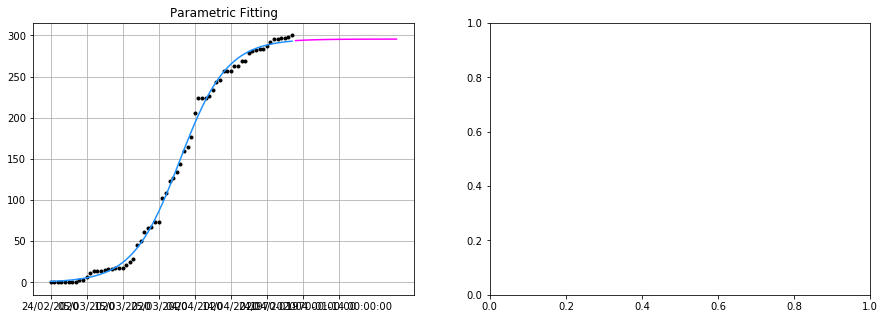

In [45]:
preds = forecast_curve(df["total_case"], logistic_f, logistic_model, pred_ahead=30, zoom=7)